In [4]:
# Imports

import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Make Python scripts available to Jupyter notebook
%run helper_functions


In [7]:
# Set Path

file_name = 'a_b_data.csv'
file_path = refactor_path(f"{os.getcwd()}/Data_Sets/{file_name}")


In [8]:
# Read and explore data set

# Convert Pandas dataframe
df = pd.read_csv(file_path)

# Display dataframe
print(f"DataFrame:\n{df}")

# Display summary
print(f"\nSummary:")
df.info()

# Display statistics
print(f"\nStatistics:")
df.describe(include='all')

DataFrame:
     a_value    b_value
0         74  79.775152
1         29  23.177279
2         22  25.609262
3         20  17.857388
4         39  41.849864
..       ...        ...
295       71  65.545888
296       46  47.334876
297       59  54.090637
298       62  63.297171
299       44  52.459467

[300 rows x 2 columns]

Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   a_value  300 non-null    int64  
 1   b_value  300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB

Statistics:


,a_value,b_value
count,300.000000,300.000000
mean,50.456667,51.088384
std,28.519455,29.061835
min,0.000000,-3.467884
25%,28.000000,25.628387
50%,50.500000,52.037115
75%,72.000000,74.303007
max,100.000000,125.450379


In [17]:
# Set the label and features

# Label
y_label_name = 'b_value'
y_label_classes = df[y_label_name].unique()
print(f"y_label_classes: {y_label_classes}")

# Features
x_feature_names = list(df.columns)
x_feature_names.remove(y_label_name)
print(f"x_feature_names: {x_feature_names}")

# Convert to NumPy arrays
np_x_feature = df[x_feature_names].to_numpy() 
np_y_label = df[y_label_name].to_numpy()

y_label_classes: [ 79.77515201  23.17727887  25.60926156  17.85738813  41.84986439
   9.80523488  58.87465933  67.61793701  18.39512747   8.74674765
   2.81141583  17.09537241  95.14907176  61.38800663  40.24701716
  14.82248589  66.95806869  16.63507984  90.65513736  77.22982636
  92.11906278  46.91387709  89.82634442  21.71380347  97.41206981
  57.01631363  78.31056542  19.1315097   93.03483388  26.59112396
  97.55155344  31.43524822  39.12724777  78.61042432  33.07112825
  51.69967172  53.62235225  69.46306072  25.42497237  36.34644189
  95.06140858  68.16724757  50.96155532  78.04237454   5.60766487
  36.11334779  67.2352155   65.01324035  38.14753871  30.31141446
  95.28503937  87.84749912  54.08170635  31.93063515  59.61247085
  -1.04011421  47.49374765  62.60089773  70.9146434   56.14834113
  14.05572877  68.11367147  75.59701346  59.225745    85.45504157
  17.76197116  38.68888682  50.96343637  51.83503872  17.0761107
  46.56141773  10.34754461  77.91032969  50.17008622  13.256

In [9]:
# Set model variables
random_state=0
test_size=0.25

In [12]:
# Model Full Set

# Train
model = LinearRegression().fit(np_x_feature, np_y_label)

# Predict
y_predict = model.predict(np_x_feature)

# Evaluate
b_intercept = model.intercept_
m_slope = model.coef_
r2 = model.score(np_x_feature, np_y_label)
print(f"b_intercept: {b_intercept}")
print(f"m_slope: {m_slope}")
print(f"r2: {r2}")

b_intercept: 0.9218745006991327
m_slope: [0.99424939]
r2: 0.9519782927705587


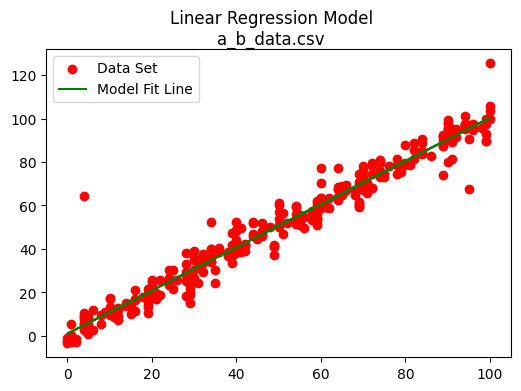

In [13]:
# Visualize Full Set

fig = plt.figure(figsize=(6,4))
fig.suptitle(f"Linear Regression Model\n{file_name}")
plt.scatter(np_x_feature, np_y_label, c="red", label='Data Set')
plt.plot(np_x_feature, y_predict, c="green", label='Model Fit Line')
plt.legend()
plt.show()

In [15]:
# Model Split Set

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(np_x_feature, np_y_label, test_size=test_size, random_state=random_state)

# Train
model_split = LinearRegression().fit(x_train,y_train)

# Predict
y_predict_split = model.predict(x_test)

# Evaluate
b_intercept_split = model_split.intercept_
m_slope_split = model_split.coef_
r2_split = model_split.score(x_test,y_test)
print(f"b_intercept_split: {b_intercept_split}")
print(f"m_slope_split: {m_slope_split}")
print(f"r2_split: {r2_split}")


b_intercept_split: 0.8278064969320695
m_slope_split: [0.99873334]
r2_split: 0.9479131777760819


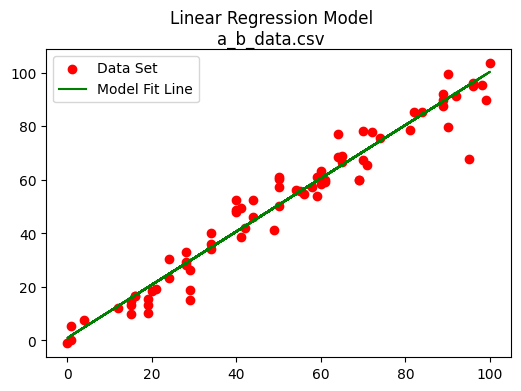

In [16]:
# Visualize Split Set

fig = plt.figure(figsize=(6,4))
fig.suptitle(f"Linear Regression Model\n{file_name}")
plt.scatter(x_test, y_test, c="red", label='Data Set')
plt.plot(x_test, y_predict_split, c="green", label='Model Fit Line')
plt.legend()
plt.show()